In [ ]:
'''
開始前，必須先去下載 GCP 為我們搜集的Log
並把名字改為 downloaded-logs.csv
上傳到colab

'''

In [6]:
'''
讀取csv

python read csv
https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/
'''
import pandas as pd 
data = pd.read_csv("downloaded-logs.csv") 
data

,httpRequest.protocol,httpRequest.requestMethod,httpRequest.requestUrl,httpRequest.userAgent,insertId,jsonPayload.destination,jsonPayload.events,labels.python_logger,logName,receiveLocation,...,resource.labels.service_name,resource.type,severity,sourceLocation.file,sourceLocation.function,sourceLocation.line,spanId,timestamp,trace,traceSampled
0,HTTP/1.1,POST,http://ncu-bot-dev-bv66sqfnma-df.a.run.app/cal...,LineBotWebhook/2.0,1io08fcg1a2zrsy,Ua7f0d7eff1911e6f83d479dd687e7c6f,"[{""timestamp"":1679307187978,""source"":{""type"":""...",ncu_bot_event,projects/tibame-a321-gcp-ai-tutorial/logs/ncu_...,NaN,...,ncu-bot-dev,cloud_run_revision,INFO,/app/app.py,callback,69,177ad337f0da4387,2023-03-20T10:13:34.339666Z,projects/tibame-a321-gcp-ai-tutorial/traces/e6...,True


In [7]:
'''
抓出指定欄位 - jsonPayload.message

'''
data['jsonPayload.message']

KeyError: ignored

In [8]:
import json
json_data_list = []
 
df_message = pd.DataFrame(columns=['timestamp','deliveryContext','webhookEventId','source','replyToken', 'type','mode','message'])
new_data = data[data['jsonPayload.events'].notna()]
 
for row in  new_data['jsonPayload.events']:
  if(len(json.loads(row))>0):
    event = json.loads(row)[0]
    if json.loads(row)[0].get('message'):
      event = json.loads(row)[0]
    # json_data_list.append()
    # print(line_event.get('type'))
    # print(line_event.get('message'))
    # print(line_event.get('message').get('id'))
    # print(line_event.get('timestamp'))
    # print(line_event.get('source').get('userId'))
    if event.get('type') not in ['follow','unfollow','postback']:
      df_message = df_message.append(
          {
            'userId': event.get('source').get('userId'),
            'timestamp': event.get('timestamp'), 
            'event_type': event.get('type'),
            'message_type': event.get('message').get('type'),
            'message_id': event.get('message').get('id'),
            'message_text': event.get('message').get('text')
          },
          ignore_index=True)
    elif event.get('type')  in ['postback']:
      df_message =df_message.append(
          {
            'userId': event.get('source').get('userId'), 
            'timestamp': event.get('timestamp'), 
            'event_type': event.get('type'),
            'message_text': event.get('postback').get('data')
          },
          ignore_index=True
      )
    else:
      df_message = df_message.append(
          {
            'userId': event.get('source').get('userId'), 
            'timestamp': event.get('timestamp'), 
            'event_type': event.get('type')
          },
          ignore_index=True)

<ipython-input-8-5af85e7cff89>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_message = df_message.append(


In [21]:
'''
將jsonPayload.message 的欄位內容 轉成csv
 
欄位若無值，則不填
 
'''
import json
json_data_list = []
 
df_message = pd.DataFrame(columns=['userId', 'timestamp', 'event_type','message_type','message_id', 'message_text'])
i = 0
for row in data['jsonPayload.events']:
  i += 1
  print(row) # 看長相
  print(type(row)) # 檢驗 row 的型別
  # print(i) 
  # print(len(json.loads(row))) # 檢驗每個 jsonPayload.events 事件，清單中的元素數量
  events = json.loads(row)[0] # 將字串轉成 json格式後，才可以對她進行操作，讀取
  # print(events) 
  if events:
    # print(event) 
    if events.get('type') not in ['follow','unfollow','postback']:
      df_message = df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type'),
            'message_type': events.get('message').get('type'),
            'message_id': events.get('message').get('id'),
            'message_text': events.get('message').get('text')
          },
          ignore_index=True)
    elif events.get('type')  in ['postback']:
      df_message =df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type'),
            'message_text': events.get('postback').get('data')
          },
          ignore_index=True
      )
    else:
      df_message = df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type')
          },
          ignore_index=True)
 
df_message

[{"timestamp":1679307187978,"source":{"type":"user","userId":"Uace63bd0ceeedefc9a5dd6b7804ac4ad"},"type":"unfollow","deliveryContext":{"isRedelivery":false},"webhookEventId":"01GVZ849V79RPR85CSSJH2VCNN","mode":"active"}]
<class 'str'>


<ipython-input-21-073d469dd465>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_message = df_message.append(


,userId,timestamp,event_type,message_type,message_id,message_text
0,Uace63bd0ceeedefc9a5dd6b7804ac4ad,1679307187978,unfollow,NaN,NaN,NaN


In [ ]:
# 安裝line 套件
!pip install line-bot-sdk

In [20]:
'''

設置Line Bot Api 的 Channel access token

'''

from linebot import (
    LineBotApi, WebhookHandler
)

line_bot_api = LineBotApi('CHANNEL_ACCESS_TOKEN')

In [12]:
'''
取出用戶id，向Line要個資
整理成一份用戶個資名單
'''


user_info_df= pd.DataFrame(columns=['userId', 'display_name', 'picture_url','status_message'])

for user_id in df_message['userId'].unique():
  try:
    line_user_profile = line_bot_api.get_profile(user_id)
    
    user_info_df = user_info_df.append(
        {
          'display_name': line_user_profile.display_name, 
          'userId': line_user_profile.user_id, 
          'picture_url': line_user_profile.picture_url,
          'status_message': line_user_profile.status_message
        },
        ignore_index=True)
  except:
    pass

user_info_df

,userId,display_name,picture_url,status_message


In [13]:
'''

將用戶個資名單跟 jsonPayload的欄位內容 整理在一份csv

'''
merge_data = pd.merge(df_message, user_info_df)
merge_data

,timestamp,event_type,message_type,message_id,message_text,userId,display_name,picture_url,status_message


In [14]:
'''
timestamp 轉換成人類可懂的時間
'''

import datetime
human_use_date=[]
for stamp in merge_data['timestamp']:
  
  timestamp = datetime.datetime.fromtimestamp(
      stamp/1000+8*3600
      )
  human_use_date.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
  

merge_data['human_date']=human_use_date
merge_data

,timestamp,event_type,message_type,message_id,message_text,userId,display_name,picture_url,status_message,human_date


In [15]:
'''
將資料存成csv
'''
merge_data.to_csv("final_data.csv")

In [16]:
'''

進行可視化

外國人不考慮中文，中文會是亂碼

'''



'\n\n進行可視化\n\n外國人不考慮中文，中文會是亂碼\n\n'

IndexError: ignored

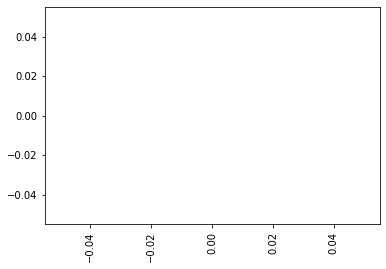

In [17]:
'''
看看誰發的話多
'''

merge_data['userId'].value_counts().sort_index().plot.bar()
# merge_data['timestamp'].plot.hist()

IndexError: ignored

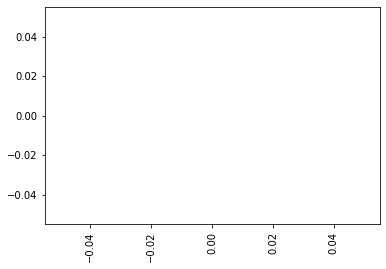

In [18]:
'''
看看都發哪一類型的消息
'''
merge_data['message_type'].value_counts().sort_index().plot.bar()